# Rodney

1. [lancamento moedas](https://abdulazizalghannami.medium.com/from-tossing-coins-to-predicting-stock-prices-dca55f5bceed)
1. [markov](https://medium.com/swlh/exploring-markov-chains-in-stock-market-trends-48e1a4951193)
1. [teoria de jogos](https://ghannami.com/an-informational-introduction-to-game-theory-and-the-stock-market/)




# Moedas
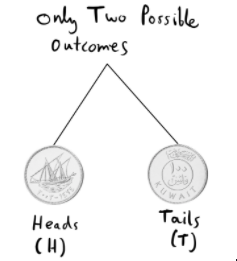


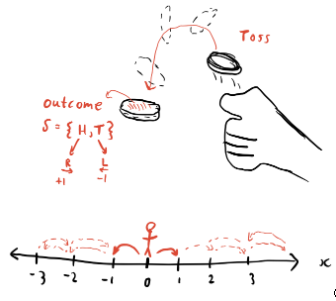

http://www.rpgroup.caltech.edu/ncbs_pboc/code/t03_stochastic_simulations.html

In [1]:
import logging
log = logging.getLogger(__name__)
# logging.basicConfig(level=logging.DEBUG) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
%matplotlib inline

In [3]:
flip_1 = np.random.rand()
flip_2 = np.random.rand()
flip_3 = np.random.rand()
print(flip_1, flip_2, flip_3)

0.5826197858920159 0.06525367663882387 0.511342601193914


In [4]:
flips = [flip_1, flip_2, flip_3]
for flip in flips:
    if flip < 0.5:
        print("Heads")
    else: 
        print("Tails")

Tails
Heads
Tails


## Jogando moedas n vezes

In [5]:
def play_coins(n_flips = 10000):
    # Test that our coin flipping algorithm is fair.
    # n_flips = Quantidade de jogadas!
    p = 0.5  # Probabilidade de Cara.

    # Flip the coin n_flips times.
    flips = np.random.rand(n_flips)
    print(f'flips: {len(flips)} | {flips} ')

    # Compute the number of heads.
    heads_or_tails = flips < p  # Will result in a True (1.0) if heads.
    n_heads = np.sum(heads_or_tails)  # Gives the total number of heads.

    # Compute the probability of a heads in our simulation.
    p_sim = n_heads / n_flips
    print(f'Predicted p = {p}. Simulated p = {p_sim}.')
    print()
    
play_coins()
play_coins()
play_coins()

flips: 10000 | [0.77763096 0.70012135 0.41310886 ... 0.9524939  0.37415464 0.61805768] 
Predicted p = 0.5. Simulated p = 0.4996.

flips: 10000 | [0.86313679 0.85868457 0.0028133  ... 0.01525931 0.53636452 0.27790552] 
Predicted p = 0.5. Simulated p = 0.5029.

flips: 10000 | [0.67373322 0.30646344 0.7489679  ... 0.45480466 0.13079818 0.12991587] 
Predicted p = 0.5. Simulated p = 0.499.



## Passeios Aleatórios e Difusão

In [6]:
# Define our step probability and number of steps.
step_prob = 0.5  # Pode ir para a esquerda ou para a direita igualmente.
n_steps = 1000   # Essencialmente tempo.

# Set up a vector to store our positions. 
position = np.zeros(n_steps)  # Full of zeros.

# Loop through each time step.
for i in range(1, n_steps):
    # Flip a coin.
    flip = np.random.rand()
    
    # Figure out which way we should step.
    if flip < step_prob:
        step = -1  # To the 'left' / 'down'. HEAD
    else:
        step = 1  # to the 'right' / 'up'.   TAIL
        
    # Update our position based off of where we were in the last time point. 
    position[i] = position[i-1] + step
    
# log.debug(f'position: {position}')

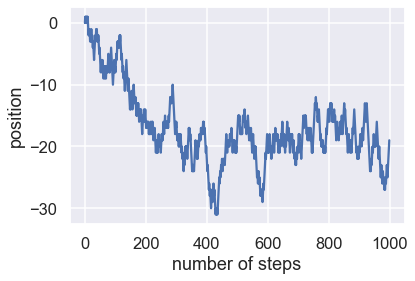

In [7]:
# Make a vector of time points.
steps = np.arange(0, n_steps, 1)  # Arange from 0 to n_steps taking intervals of 1.

# Plot it!
plt.plot(steps, position)
plt.xlabel('number of steps')
plt.ylabel('position');

Rodando n vezes esses passos aleatorios

In [8]:
# Perform the random walk 1000 times. 
n_simulations = 1000

# Make a new position vector. This will include all simulations.
position = np.zeros((n_simulations, n_steps))

# Redefine our step probability just to be clear. 
step_prob = 0.5

# Loop through each simulation.
for i in range(n_simulations):
    # Loop through each step. 
    for j in range(1, n_steps):
        # Flip a coin.
        flip = np.random.rand()
        
        # Figure out how to step.
        if flip < step_prob:
            step = -1 # HEAD
        else:
            step = 1 # TAIL
            
        # Update our position.
        position[i, j] = position[i, j-1] + step

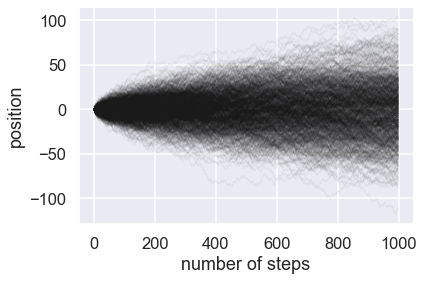

In [9]:
# Plot all of the trajectories together.
for i in range(n_simulations):
    # Remembering that `position` is just a two-dimensional matrix that is 
    # n_simulations by n_steps, we can get each step for a given simulation 
    # by indexing as position[i, :].
    plt.plot(steps, position[i, :], color='k', linewidth=1, alpha=0.05) 
    
# Add axis labels.
plt.xlabel('number of steps')
plt.ylabel('position');

## Observando a distribuição no tempo t = 200

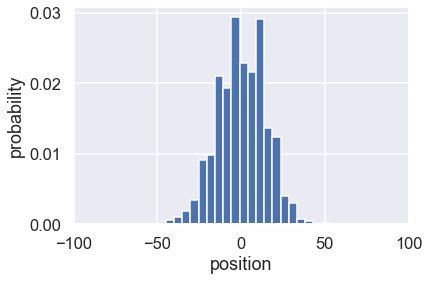

In [10]:
# Make a histogram of the positions. To look at t=200, we have to index at 
# 199 because indexing starts at 0  in Python. We'll also normalize the 
# histogram (density=True) so we can get a measure of probability.
plt.hist(position[:, 199], bins=20, density=True)
plt.xlabel('position')
plt.ylabel('probability')

# Set the xlimits to cover the entire range. 
plt.xlim([-100, 100]);

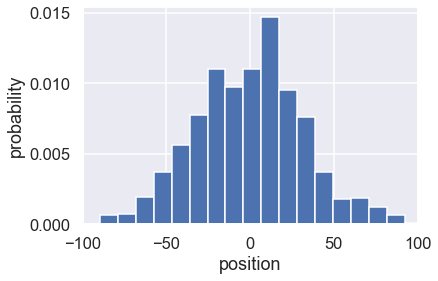

In [11]:
# Make a histogram of the positions. To look at t=200, we have to index at 
# 199 because indexing starts at 0  in Python. We'll also normalize the 
# histogram (density=True) so we can get a measure of probability.
plt.hist(position[:, -1], bins=20, density=True)
plt.xlabel('position')
plt.ylabel('probability')

# Set the xlimits to cover the entire range. 
plt.xlim([-100, 100]);

Parece ser uma distribuição Gaussiana. Calculando a posição média de cada passo da simulação em vermelho, temos:

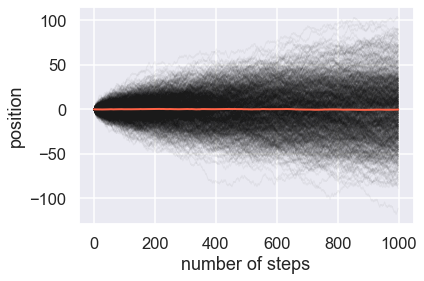

In [12]:
# Compute the mean position at each step and plot it. 
mean_position = np.zeros(n_steps)
for i in range(n_steps):
    mean_position[i] = np.mean(position[:, i])

# Plot all of the simulations.
for i in range(n_simulations):
    plt.plot(steps, position[i, :], color='k', linewidth=1, alpha=0.05)
    
# Plot the mean as a thick red line. 
plt.plot(steps, mean_position, color='tomato', linewidth=2)

# Add the labels.
plt.xlabel('number of steps')
plt.ylabel('position');

Passeio aleatorio sem vies de lançamento de moedas

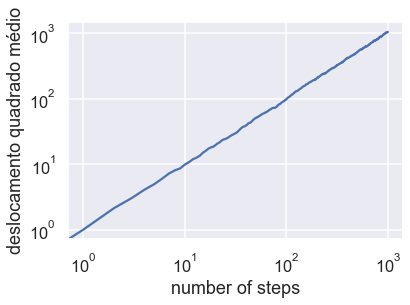

In [13]:
# Compute the mean squared displacement.
msd = np.zeros(n_steps)
for i in range(n_steps):
    msd[i] = np.mean(position[:, i]**2)

# Plot the mean squared as a function of the number of steps.
plt.loglog(steps, msd)
plt.xlabel('number of steps')
plt.ylabel('deslocamento quadrado médio');

## Passeio aritimético X Passeio geométrico

O passeio geométrico possui um fator de proporcionalidade.

Se H multiplica por 1.01, se T multiplica por 0.99 o valor anterior.

In [14]:
# Define our step probability and number of steps.
step_prob = 0.5  # Pode ir para a esquerda ou para a direita igualmente.
n_steps = 100   # Essencialmente tempo.

# Set up a vector to store our positions. 
position = np.zeros(n_steps)  # Full of zeros.
position_arit = np.zeros(n_steps)

start = 158   # Valor inicial ação da Boeing
position[0] = start
position_arit[0] = start

# Loop through each time step.
for i in range(1, n_steps):
    # Flip a coin.
    flip = np.random.rand()
    
    # Figure out which way we should step.
    if flip < step_prob: #
        position[i] = position[i-1] * 1.01 # Head
        position_arit[i] = position_arit[i-1] + 1
    else:
        position[i] = position[i-1] * .99  # Tail
        position_arit[i] = position_arit[i-1] - 1
        
    
# print(f'position: {position}')

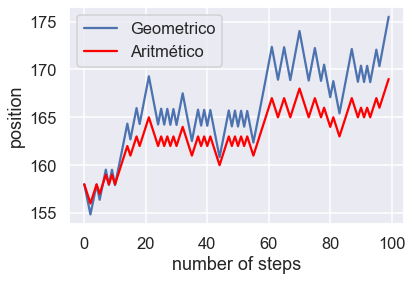

In [15]:
# Make a vector of time points.
steps = np.arange(0, n_steps, 1)  # Arange from 0 to n_steps taking intervals of 1.

# Plot it!
plt.plot(steps, position)
plt.plot(steps, position_arit, color='red')
plt.xlabel('number of steps')
plt.ylabel('position')
plt.legend(['Geometrico', 'Aritmético']);

# Markov e Passeio aleatorio

Um **processo estocástico** é aquele em que uma variável aleatória evolui ao longo do tempo. Existem duas ideias de tempo, o discreto e o contínuo. O tempo discreto é contável, enquanto o tempo contínuo não.

A **propriedade de Markov** é uma afirmação simples onde dizemos: dado o presente, o futuro é independente do passado. É uma propriedade pertencente a um processo sem memória, pois depende exclusivamente do estado atual e da aleatoriedade da transição para os próximos estados. Essa propriedade pode ser vista na figura acima do lado esquerdo da equação onde existe uma probabilidade condicional de qual será o futuro, dado o resultado do tempo presente t. [ref](https://medium.com/swlh/exploring-markov-chains-in-stock-market-trends-48e1a4951193)

Existem três medidas que precisamos estar cientes para que possamos construir uma cadeia de Markov:
- **Estados**: Todos os estados (ocorrências) dentro do espaço de estados 's' do sistema dinâmico
- **Distribuição de estado inicial**: A distribuição de probabilidade inicial do estado inicial. É codificado em um vetor de coluna denotado como 'q'
- **Probabilidades de transição de estado**: probabilidade de transição de passar de um estado para outro. É codificado em uma matriz s-by-s denotada como 'P'

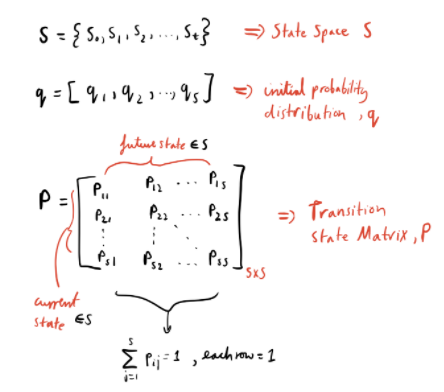

## Mercado de ações

Sistema dinâmico e a suposição inicial é de que ele é aleatorio (como nas moedas).

Estados:
- **Bull**:o preço está aumentando
- **Bear**: o preço está diminuindo
- **Stagnant**: não há variação de preço, nem aumentando nem diminuindo

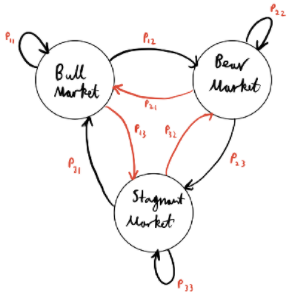

Usando dados históricos, é possivel determinar padrões, e assim determinar propabilidades. Como tem-se 3 estados, cria-se uma matriz 3 por 3.

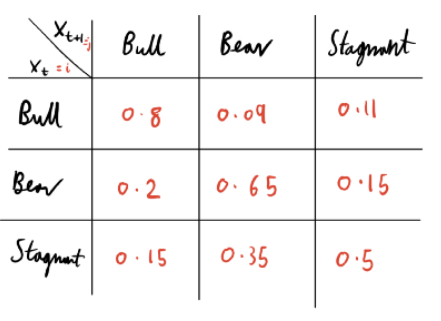
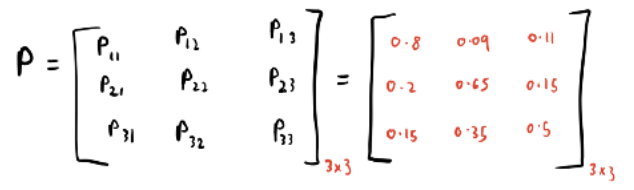

O mais **importante** é a matriz de transião de estados.

## Mercado de Ações em 2 dias

Considere o estado inicial como:

q = [Bull, bear, stagnant] = [1 0 0 ] (mercado em alta)

Como estará o mercado em dois dias?

In [32]:
# https://www.programiz.com/python-programming/matrix
q = np.array([1, 0 , 0])
q

array([1, 0, 0])

In [45]:
P = np.array([[.8, .09, .11], [.2, .65, .15], [.15, .35, .5]])
P

array([[0.8 , 0.09, 0.11],
       [0.2 , 0.65, 0.15],
       [0.15, 0.35, 0.5 ]])

In [113]:
np.matmul(P,P)

array([[0.6745, 0.169 , 0.1565],
       [0.3125, 0.493 , 0.1945],
       [0.265 , 0.416 , 0.319 ]])

In [112]:
P2 = P.dot(P)
P2

array([[0.6745, 0.169 , 0.1565],
       [0.3125, 0.493 , 0.1945],
       [0.265 , 0.416 , 0.319 ]])

In [51]:
second_day = q.dot(P2)
second_day

array([0.6745, 0.169 , 0.1565])

Em conclusão, podemos deduzir da matriz 1 por 3 final que daqui a dois dias há uma chance maior de obter um mercado em alta p = 0,6745 em comparação com p = 0,1690 para um mercado em baixa ou p = 0,1565 para um mercado estagnado

In [42]:
@

array([0.64  , 0.0081, 0.0121])

In [36]:
P2 = np.multiply(P, P)
P2

array([[0.64  , 0.0081, 0.0121],
       [0.04  , 0.4225, 0.0225],
       [0.0225, 0.1225, 0.25  ]])

## Mercado de ações em n dias

In [140]:
# https://likegeeks.com/numpy-matrix-multiplication/
def simu(n_days):
    q = np.array([1, 0, 0])
    P = np.array([[.8, .09, .11], [.2, .65, .15], [.15, .35, .5]])
    
#     for i in range(n_days ):
#         P = P.dot(P)

#     for i in range(n_days ):
#         P = np.matmul(P,P)

#     for i in range(n_days ):
#         P =P @ P

    P = np.linalg.matrix_power(P, n_days)

    return q @ P
simu(1200)

array([0.4748062 , 0.32364341, 0.20155039])

As cadeias de Markov foram inicialmente descobertas como resultado da prova de que mesmo os resultados dependentes seguem um padrão. Historicamente, acreditava-se que apenas os resultados independentes seguem uma distribuição. Como vimos, mesmo as cadeias de Markov eventualmente se estabilizam para produzir uma distribuição estacionária

# Teoria dos jogos

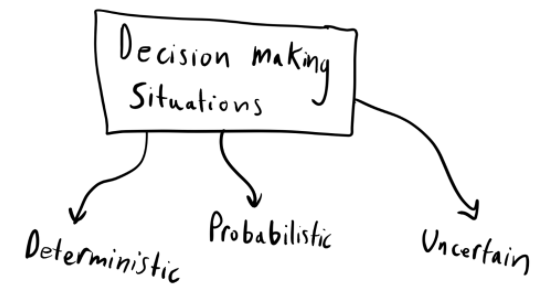

Situações distintas para tomada de decisão:
- **Situação determinística**: é uma decisão sob certeza com informações completas
- **Situação probabilística**: é uma decisão sob risco com informação parcial que é descrita por uma distribuição de probabilidade
- **Situação incerta**: é uma decisão sob incerteza com informações incompletas

Agora, essas interações, esses jogos, vêm em duas categorias principais:
- **jogos cooperativos**: todos se beneficiam trabalhando juntos. por exemplo. dirigindo no lado direito da estrada.
- **jogos não cooperativos**: ex. o dilema dos prisioneiros

Outras categorias:
- **jogos de soma zero**: Um jogador ganha e outro é derrotado e vice e versa.
- **jogos não de soma zero**: permite os ganhos e perdas mútuas.

Propriedade importantes de qualquer jogo:
- **A estratégia Dominante**: estratégias que são melhores do que outras estratégias para um jogador, não importa como o oponente jogue. Eles não são ideais se você estiver em um jogo em que cada jogador tem uma estratégia dominante. assim, no dilema do prisioneiro, a estratégia dominante é trair e ficar em silêncio.
- **O equilíbrio de Nash**: é um estado que ninguém pode melhorar. Todo jogo finito tem pelo menos um equilíbrio de Nash.

## Condicionais de jogo

1. Um jogo precisa incluir vários jogadores (2 ou mais)
1. Cada jogador tem duas ou mais escolhas ou sequência de escolhas
1. Todas as combinações possíveis dessas decisões são jogadas que resultam em um resultado claro = ganhar ou perder
1. É claro como você pode ganhar ou perder. os participantes ganharão ou perderão algo dependendo do resultado.
1. Os jogadores conhecem as regras do jogo, bem como as recompensas de outros jogadores.
1. Os jogadores são (perfeitamente) pessoas racionais e sensatas agindo por seu próprio interesse.

Estratégias:
- pura
- particular
- mista

Dinamica de jogo:
- **sequencial**: (onde jogadores posteriores têm algum conhecimento de ações anteriores) são denotados por árvores de decisão.
- **simultâneo**: em que ambos os jogadores podem ou não se moverem juntos. São indicados por marizes de *Payoff* 

## Concurso de beleza (Keynesian Beauty Contest)


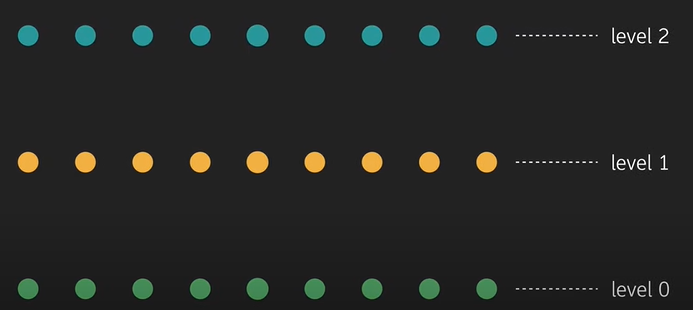
- Nivel 0: A estratégia ingênua: escolha os rostos que você pessoalmente acha atraentes
- Nivel 1: Nível básico: suponha que cada jogador escolha os rostos que eles acham mais bonitos, então você seleciona os rostos que acha que todo mundo acha mais atraente
- Nivel 2: suponha que cada jogador escolha os rostos que eles acham que todos os outros acharão os mais bonitos
….
..
.
- Ultimo Nível: O equilíbrio de Nash (não realista, pois os humanos limitaram a racionalidade, não a racionalidade perfeita)

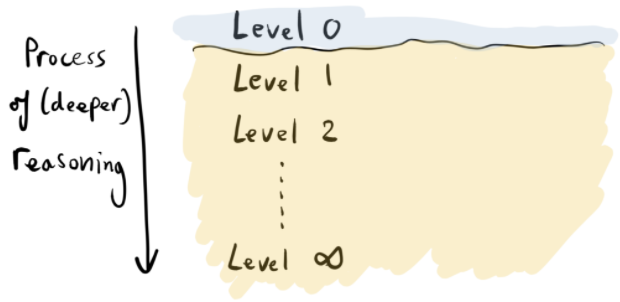

Keynes viu que o mercado de ações funcionava de maneira semelhante ao concurso de beleza; onde **TODOS QUEREM COMPRAR ANTES DE TODOS E QUEREM VENDER ANTES DE TODOS**. Essencialmente, a semelhança entre o Keynes Beauty Contest e o mercado de ações parece aparente no comércio de curto prazo, onde a 'borda' é a estratégia mencionada anteriormente de assumir o que todos supõem que o estoque mais atraente é um nível alto/próximo ao infinito, em vez de se concentrar em os fundamentos das ações.



In [142]:
text = 'todos querem comprar antes de todos e querem vender antes de todos'.upper()
text

'TODOS QUEREM COMPRAR ANTES DE TODOS E QUEREM VENDER ANTES DE TODOS'

mm

mm

mm